<a href="https://colab.research.google.com/github/HenryU20201C579/TP_PRO_DE_IMG/blob/main/TP_Pro_de_img.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRANTES
- Diaz Huarcaya Henry Josue
- Arquiñigo Jacinto Ibrahim Imanol
- Santisteban Cerna José Mauricio
- Caballero Lara Eduardo Roman

In [29]:
!git clone https://github.com/HenryU20201C579/TP_PRO_DE_IMG.git

fatal: destination path 'TP_PRO_DE_IMG' already exists and is not an empty directory.


In [30]:
#!unzip TP_PRO_DE_IMG/drive-download-20230503T231058Z-001.zip
#!unzip TP_PRO_DE_IMG/drive-download-20230503T231058Z-001.zip -d dataset_peliculas
#!unzip TP_PRO_DE_IMG/drive-download-20230503T231238Z-001.zip -d dataset_juegos

In [31]:
import numpy as np
import cv2
import os, os.path

imageDir = "dataset_juegos"
image_set = []

#Creamos una lista con las extensiones aceptadas en la aplicacion
valid_image_extensions = [".jpg", ".jpeg"]
valid_image_extensions = [item.lower() for item in valid_image_extensions]

file_list = os.listdir(imageDir)

#Recorremos cada archivo y lo incluimos si cumple con la extension
for file in file_list:
    extension = os.path.splitext(file)[1]
    if extension.lower() not in valid_image_extensions:
        continue
    image_set.append(os.path.join(imageDir, file))

#Creamos un diccionario
dict = {}

#Para cada imagen, la leemos, calculamos el histograma, lo aplanamos y normalizamos
#El histograma se guarda en un diccionario
for imageName in image_set:
    try:
      #para que se lea a blanco y negro:
      #image = cv2.imread(imageName,0)
      #para que se lea a color:
      image = cv2.imread(imageName) #OpenCV lee en formato BGR (azul, verde y rojo)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
      hist = cv2.calcHist([image], [0,1], None, [8,8], [0, 128, 0 , 256]) #tamaño del hist: 8^3 = 512
      #en blanco y negro: 
      #hist = cv2.calcHist([image], [0], None, [8], [0, 256])
      desc = hist.flatten()
      desc = desc/(image.shape[0] * image.shape[1])
      dict[imageName] = desc
    except:
      continue

In [32]:
#Hacer busqueda de una imagen aleatoria
import random

#Escogemos un archivo aleatorio
queryName = random.choice(file_list)
print(queryName)

#Calculamos el histograma para la imagen seleccionada
queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

#Calculamos las distancias a los histogramas almacenados
distances = []

for imageName in image_set:
    try:
      dist = np.linalg.norm(descQuery - dict[imageName])
      distances.append(dist)
    except:
      continue

#Ordenamos por distancias
index = np.argsort(distances)



99-1552421539.jpg


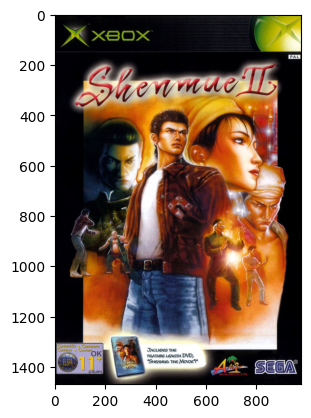

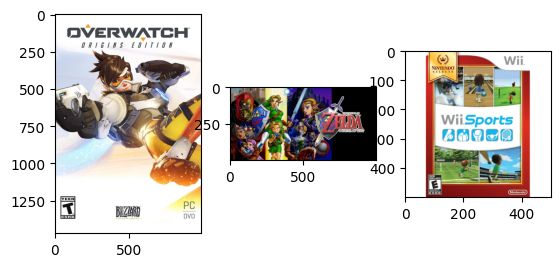

In [33]:
from matplotlib import pyplot as plt

#Seleccionamos los tres menores para visualizar
fig1 = plt.imshow(queryImage[:,:,:], cmap='gray')
# fig1 = plt.imshow(queryImage)
#fig1 = plt.imshow(queryImage, cmap='gray')
plt.show()

fig2 = plt.figure()

for i in range(1, 4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])

plt.show()


Final-Fantasy-XII.jpg


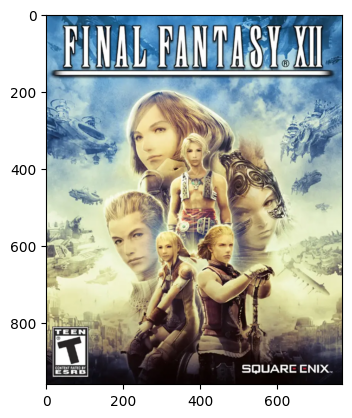

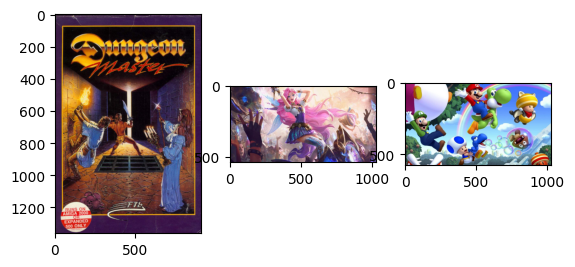

In [34]:
queryName = random.choice(file_list)
print(queryName)

#Calculamos el histograma para la imagen seleccionada
queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

#Calculamos las distancias a los histogramas almacenados
distances = []

for imageName in image_set:
    try:
      dist = np.linalg.norm(descQuery - dict[imageName])
      distances.append(dist)
    except:
      continue

#Ordenamos por distancias
index = np.argsort(distances)


#Seleccionamos los tres menores para visualizar
fig1 = plt.imshow(queryImage[:,:,:], cmap='gray')
# fig1 = plt.imshow(queryImage)
#fig1 = plt.imshow(queryImage, cmap='gray')
plt.show()

fig2 = plt.figure()

for i in range(1, 4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])

plt.show()

In [35]:
imageDir = "dataset_peliculas"
image_set = []

#Creamos una lista con las extensiones aceptadas en la aplicacion
valid_image_extensions = [".jpg", ".jpeg"]
valid_image_extensions = [item.lower() for item in valid_image_extensions]

file_list = os.listdir(imageDir)

#Recorremos cada archivo y lo incluimos si cumple con la extension
for file in file_list:
    extension = os.path.splitext(file)[1]
    if extension.lower() not in valid_image_extensions:
        continue
    image_set.append(os.path.join(imageDir, file))

#Creamos un diccionario
dict = {}

#Para cada imagen, la leemos, calculamos el histograma, lo aplanamos y normalizamos
#El histograma se guarda en un diccionario
for imageName in image_set:
    try:
      #para que se lea a blanco y negro:
      #image = cv2.imread(imageName,0)
      #para que se lea a color:
      image = cv2.imread(imageName) #OpenCV lee en formato BGR (azul, verde y rojo)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
      hist = cv2.calcHist([image], [0,1], None, [8,8], [0, 128, 0 , 256]) #tamaño del hist: 8^3 = 512
      #en blanco y negro: 
      #hist = cv2.calcHist([image], [0], None, [8], [0, 256])
      desc = hist.flatten()
      desc = desc/(image.shape[0] * image.shape[1])
      dict[imageName] = desc
    except:
      continue

In [36]:
#Hacer busqueda de una imagen aleatoria
import random

#Escogemos un archivo aleatorio
queryName = random.choice(file_list)
print(queryName)

#Calculamos el histograma para la imagen seleccionada
queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

#Calculamos las distancias a los histogramas almacenados
distances = []

for imageName in image_set:
    try:
      dist = np.linalg.norm(descQuery - dict[imageName])
      distances.append(dist)
    except:
      continue

#Ordenamos por distancias
index = np.argsort(distances)



joker.jpg


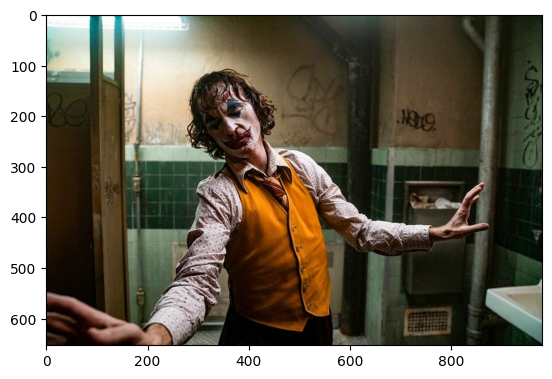

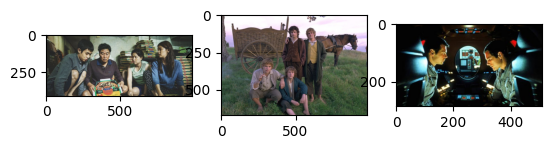

In [37]:
from matplotlib import pyplot as plt

#Seleccionamos los tres menores para visualizar
fig1 = plt.imshow(queryImage[:,:,:], cmap='gray')
# fig1 = plt.imshow(queryImage)
#fig1 = plt.imshow(queryImage, cmap='gray')
plt.show()

fig2 = plt.figure()

for i in range(1, 4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])

plt.show()


31-lucesdelaciudad.jpg


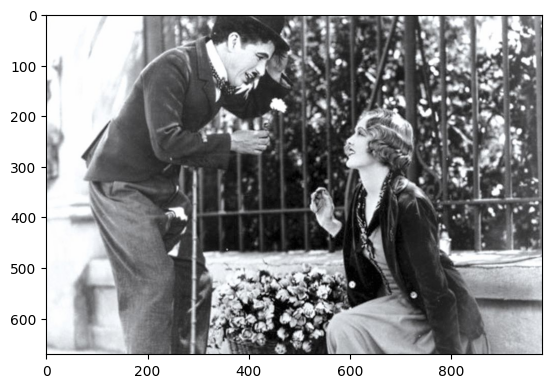

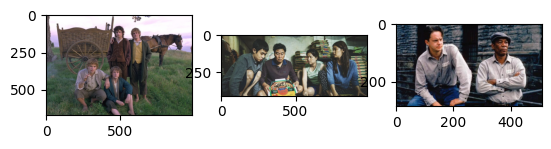

In [38]:
queryName = random.choice(file_list)
print(queryName)

#Calculamos el histograma para la imagen seleccionada
queryImage = cv2.imread(os.path.join(imageDir, queryName))
queryImage = cv2.cvtColor(queryImage,cv2.COLOR_BGR2RGB)
queryHist = cv2.calcHist([queryImage],[0,1],None,[8,8],[0,128,0,256])
descQuery = queryHist.flatten()
descQuery = descQuery/(queryImage.shape[0]*queryImage.shape[1])

#Calculamos las distancias a los histogramas almacenados
distances = []

for imageName in image_set:
    try:
      dist = np.linalg.norm(descQuery - dict[imageName])
      distances.append(dist)
    except:
      continue

#Ordenamos por distancias
index = np.argsort(distances)


#Seleccionamos los tres menores para visualizar
fig1 = plt.imshow(queryImage[:,:,:], cmap='gray')
# fig1 = plt.imshow(queryImage)
#fig1 = plt.imshow(queryImage, cmap='gray')
plt.show()

fig2 = plt.figure()

for i in range(1, 4):
    fig2.add_subplot(1, 3, i)
    imag = cv2.imread(image_set[index[i]])
    plt.imshow(imag[:,:,::-1])

plt.show()